# **Project Name**    -  **Netflix Movies and TV Shows Clustering**



##### **Project Type**    - Unsupervised (EDA + Clustering)
##### **Contribution**    - Individual
##### **Contributor** - Harsh Kumar

# **Project Summary -**



This project applies **unsupervised machine learning** techniques to analyze and segment Netflix movies and TV shows, with the goal of uncovering hidden patterns that can support content recommendation, personalization, and catalog strategy. The dataset contains rich metadata and textual descriptions, making it suitable for a combination of **feature engineering and NLP-based analysis**.

After comprehensive data wrangling and preprocessing, including missing value handling and feature creation, **textual descriptions were processed using NLP techniques** and transformed into numerical representations using **TF-IDF vectorization**. These text features were combined with selected numerical attributes to create a unified feature matrix for clustering.

Three clustering models **K-Means, Hierarchical Clustering, and DBSCAN** were implemented and evaluated. K-Means emerged as the most effective model, producing stable and interpretable clusters that clearly differentiate between movies and TV shows, modern and classic content, and mainstream versus niche titles. Hierarchical clustering closely validated these results, while DBSCAN was found unsuitable for high-dimensional sparse text data.

Model evaluation was based on **silhouette score, cluster stability, and business interpretability**, as no ground-truth labels exist. Overall, the project demonstrates a complete unsupervised ML pipeline that converts unstructured content data into actionable insights for real-world streaming platforms.


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**

Netflix has a vast and diverse catalog of movies and TV shows spanning multiple genres, countries, and formats. However, the absence of predefined labels makes it difficult to understand natural groupings and similarities within the content library.

The goal of this project is to analyze Netflix content and apply unsupervised machine learning techniques to cluster similar movies and TV shows based on textual and metadata features, thereby uncovering meaningful patterns that can support strategic business decisions such as content acquisition, personalization, and regional content planning.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [147]:
# Import Libraries

# Core data manipulation libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Statistical analysis
from scipy import stats

# Natural Language Processing (NLP)
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Text preprocessing
import re

# Machine Learning & Feature Engineering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Clustering Algorithms
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Clustering Evaluation Metrics
from sklearn.metrics import silhouette_score

# Sparse matrix utilities
from scipy.sparse import hstack

# Suppress warnings for clean output
import warnings
warnings.filterwarnings('ignore')



### Dataset Loading

In [3]:
# Load Dataset
# Using try-except to handle cases if file path is incorrect.

try:
    df = pd.read_csv('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Dataset file not found. Please upload the Netflix dataset CSV file.")


Dataset loaded successfully.


### Dataset First View

In [4]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


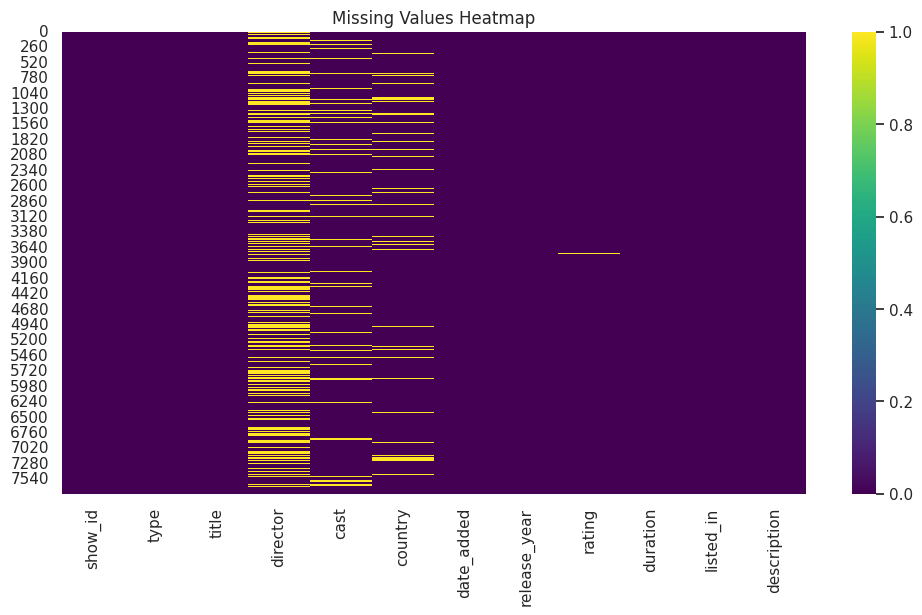

In [9]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(
    df.isnull().astype(int),
    cmap="viridis",
    cbar=True
)
plt.title("Missing Values Heatmap")
plt.show()



### What did you know about your dataset?

The dataset contains information about movies and TV shows available on Netflix. It is used to analyze Netflix’s content library and uncover patterns related to content type, genres, countries, and descriptions using exploratory data analysis and unsupervised machine learning.

The dataset consists of **7,787 rows and 12 columns**, where each row represents a unique Netflix title. It includes **categorical features** -  (type, rating, country, listed_in), **textual features** -  (title, director, cast, description), and a **numerical feature** - (release_year). There are no duplicate records, ensuring data uniqueness.

Most core columns such as show_id, type, title, release_year, duration, listed_in, and description have no missing values, indicating good data quality. A few metadata columns (director, cast, country, date_added, and rating) contain missing values, which are column-specific and non-systematic, as observed from the missing values heatmap.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description



*   show_id : Unique identifier assigned to each movie or TV show

* type : Type of content available on Netflix (Movie or TV Show)

* title : Title of the movie or TV show

* director : Director(s) of the content

* cast : List of main actors involved in the content

* country : Country or countries where the content was produced

* date_added : Date when the content was added to Netflix

* release_year : Original release year of the movie or TV show

* rating : Age rating assigned to the content (e.g., TV-MA, PG-13)

* duration : Duration of the movie in minutes or number of seasons for TV shows

* listed_in : Genre(s) or category in which the content is classified

* description : Brief summary describing the storyline or theme of the content



### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for col in df.columns:
    print(f"No. of unique values in {col} is {df[col].nunique()}.")

No. of unique values in show_id is 7787.
No. of unique values in type is 2.
No. of unique values in title is 7787.
No. of unique values in director is 4049.
No. of unique values in cast is 6831.
No. of unique values in country is 681.
No. of unique values in date_added is 1565.
No. of unique values in release_year is 73.
No. of unique values in rating is 14.
No. of unique values in duration is 216.
No. of unique values in listed_in is 492.
No. of unique values in description is 7769.


## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Create a separate copy of the dataset for wrangling

df_wrangle = df.copy()


In [14]:
# 1. Convert 'date_added' column to datetime
# errors='coerce' converts invalid or missing dates to NaT instead of breaking the code

df_wrangle['date_added'] = pd.to_datetime(
    df_wrangle['date_added'],
    errors='coerce'
)

Why this is required:

* date_added is originally an object (string).

* Time-based analysis (year-wise trends, hypothesis testing) requires a datetime format.

* This step prepares the column for feature extraction.

In [15]:
# 2. Extract Year and Month from date_added

# Extract year when the content was added to Netflix
df_wrangle['added_year'] = df_wrangle['date_added'].dt.year

# Extract month when the content was added
df_wrangle['added_month'] = df_wrangle['date_added'].dt.month


Why this is required:

* Helps analyze Netflix’s content addition trends over time.

* Enables comparisons like pre-2016 vs post-2016 content.

* Used later in EDA and hypothesis testing.

In [16]:
# 3. Handle Missing Values in Metadata Columns


# Fill missing values in metadata columns with 'Unknown'
# These columns are descriptive and missing values should not remove records

df_wrangle['director'] = df_wrangle['director'].fillna('Unknown')
df_wrangle['cast'] = df_wrangle['cast'].fillna('Unknown')
df_wrangle['country'] = df_wrangle['country'].fillna('Unknown')
df_wrangle['rating'] = df_wrangle['rating'].fillna('Unknown')


Why this is required:

* Missing values are concentrated in metadata, not core fields.

* Dropping rows would reduce dataset size unnecessarily.

* 'Unknown' preserves the record and keeps text processing consistent.

* This approach is best practice for unsupervised learning.

In [17]:
# 4. Split duration into Numeric Value and Type

# Extract numeric part of duration (e.g., 93 from '93 min', 4 from '4 Seasons')
df_wrangle['duration_value'] = (
    df_wrangle['duration']
    .str.extract('(\d+)')
    .astype(int)
)

# Identify whether the content is a Movie or TV Show based on duration text
df_wrangle['duration_type'] = df_wrangle['duration'].apply(
    lambda x: 'Season' if 'Season' in x else 'Minute'
)

Why this is required:

* Movies and TV shows use different duration formats.

* Numeric extraction enables:

  * Statistical analysis

  * Comparisons across content types

* Separating duration type avoids incorrect aggregations.

In [18]:
# 5. Clean Text Columns (Whitespace Normalization)


# Remove leading and trailing whitespaces from text-based columns
# This prevents duplicate categories caused by spacing issues

text_columns = ['title', 'director', 'cast', 'country', 'listed_in', 'description']

for col in text_columns:
    df_wrangle[col] = df_wrangle[col].str.strip()

Why this is required:

- Ensures consistent text formatting.

- Prevents issues during:

  - Text vectorization

  - Genre grouping

  - NLP preprocessing

- Lightweight cleaning suitable for this stage.

In [19]:
# 6. Final Shape Verification after wrangling

df_wrangle.shape

(7787, 16)

Why this is required:

- Confirms no rows were dropped unintentionally.

- Ensures dataset integrity before visualization.

---


| New Column                       | Why it was added                 |
| -------------------------------- | -------------------------------- |
| `added_year`                     | Enables year-wise trend analysis |
| `added_month`                    | Enables seasonal analysis        |
| `duration_value`                 | Numeric duration for analysis    |
| `duration_type`                  | Separates movies vs TV shows     |


### What all manipulations have you done and insights you found?

To make the Netflix dataset analysis-ready, several data wrangling steps were performed. The date_added column was first converted into a datetime format, and new temporal features such as added_year and added_month were extracted to support time-based analysis of content additions on Netflix.

Missing values present in metadata columns including director, cast, country, and rating were handled by imputing them with "Unknown". Since these columns are descriptive in nature and this is an unsupervised learning problem, dropping records was avoided to preserve the full dataset for clustering.

The duration column, which contains mixed formats for movies and TV shows, was split into two new features: duration_value (numeric component) and duration_type (Minute or Season). This separation enables meaningful statistical analysis and prevents incorrect comparisons between movies and TV shows.

Additionally, text-based columns were cleaned by removing leading and trailing whitespaces to ensure consistency during further text preprocessing and feature extraction.



**Insights:**

- Netflix content uses heterogeneous duration formats, making feature separation necessary.

- Metadata fields have high cardinality and are better suited for text-based analysis rather than direct encoding.

- Temporal features provide valuable signals for understanding Netflix’s content acquisition strategy.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Content Type Distribution (Movies vs TV Shows) – Univariate

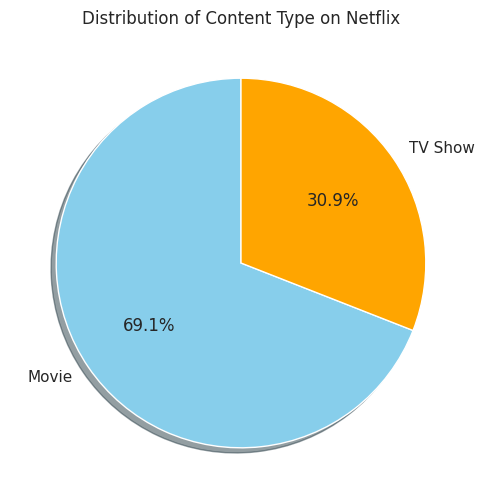

In [20]:
# Chart - 1 visualization code
# Content type distribution
plt.figure(figsize=(6,6))
df_wrangle['type'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'orange'],
    shadow=True
)
plt.title("Distribution of Content Type on Netflix")
plt.ylabel("")
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart is particularly effective when the objective is to understand how a whole is divided into major categories.

In this case, Netflix content is broadly divided into Movies and TV Shows, and visualizing their proportional contribution helps establish a baseline understanding of the catalog composition. This is a foundational insight before performing clustering, as content type directly influences duration, viewing behavior, and textual patterns.

##### 2. What is/are the insight(s) found from the chart?

- Movies form the majority of Netflix’s content.

- TV Shows, though fewer in count, often have higher engagement value due to multiple seasons.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact:

- Helps Netflix decide how to allocate investment between Movies and TV Shows.

- Supports designing separate clustering strategies for Movies and TV Shows.

Potential risk:

- Over-reliance on movies may limit long-term subscriber engagement if TV Shows are under-prioritized.

#### Chart - 2 - Year-wise Content Addition Trend (Univariate – Time Series)

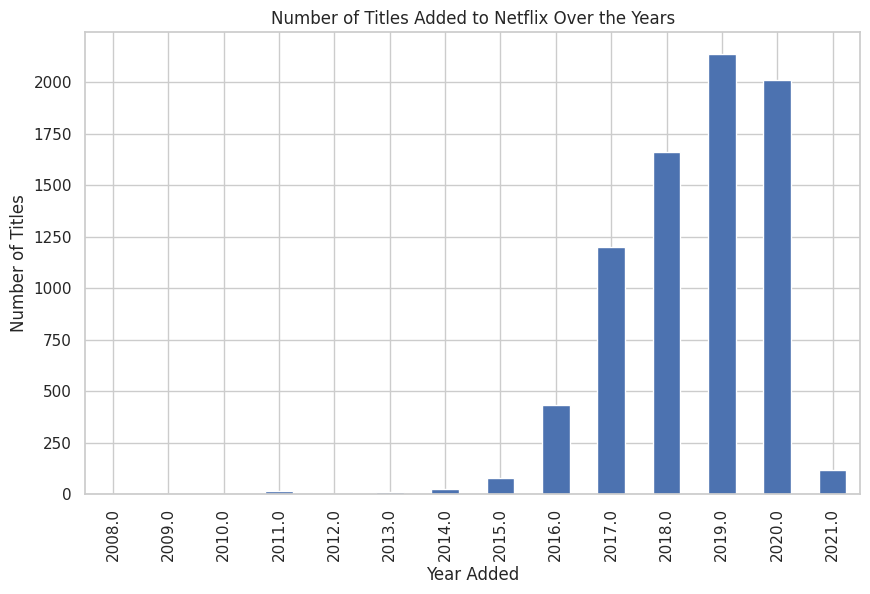

In [21]:
# Chart - 2 visualization code

plt.figure(figsize=(10,6))
df_wrangle['added_year'].value_counts().sort_index().plot(kind='bar')
plt.title("Number of Titles Added to Netflix Over the Years")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart is well-suited for visualizing year-wise frequency trends. It allows clear comparison across years and highlights growth phases, stagnation periods, or sudden spikes. Understanding content growth over time is critical for validating Netflix’s strategic shifts.

##### 2. What is/are the insight(s) found from the chart?

The chart shows a sharp increase in content additions after 2016, indicating Netflix’s aggressive global expansion and increased investment in original and international content during this period.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact:

- Confirms Netflix’s shift toward content volume scaling.

- Supports strategic planning for future growth cycles.

Potential risk:

- Rapid expansion may affect content quality control if not monitored carefully.

#### Chart - 3 - Top 10 Countries by Content Production (Univariate – Categorical)

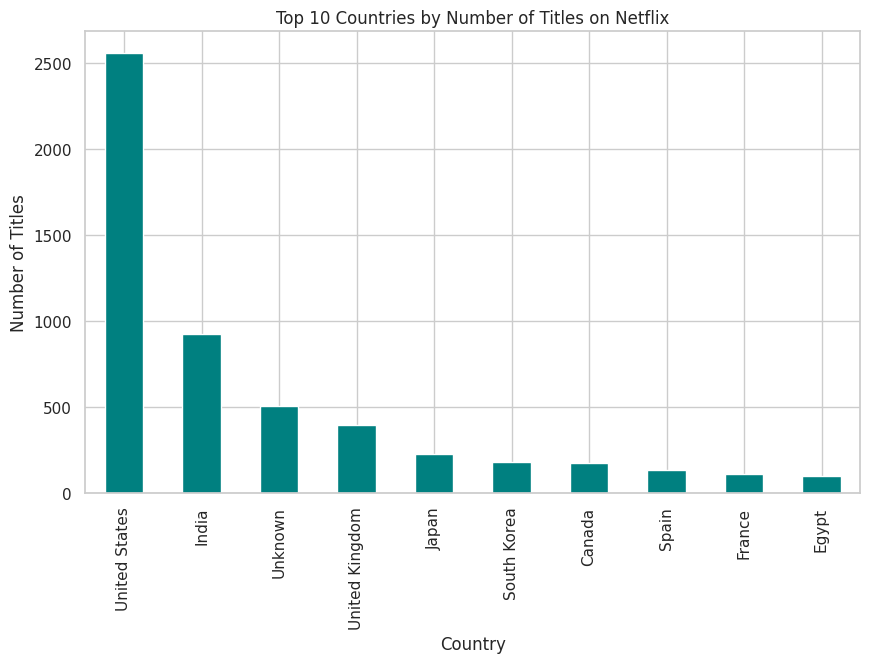

In [22]:
# Chart - 3 visualization code

top_countries = df_wrangle['country'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_countries.plot(kind='bar', color='teal')
plt.title("Top 10 Countries by Number of Titles on Netflix")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are ideal for ranking and comparing categorical variables. This visualization helps identify Netflix’s content-heavy regions, which is essential for understanding geographical diversity and market focus.

##### 2. What is/are the insight(s) found from the chart?

The United States contributes the largest number of titles, followed by countries like India, the UK, and Canada. This highlights Netflix’s dual strategy of maintaining strong domestic content while expanding internationally.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact:

- Supports localized recommendation systems.

- Helps prioritize regional investments and partnerships.

Potential risk:

- Over-concentration in a few countries may reduce cultural diversity and global appeal.

#### Chart - 4 - Distribution of Content Ratings (Univariate)

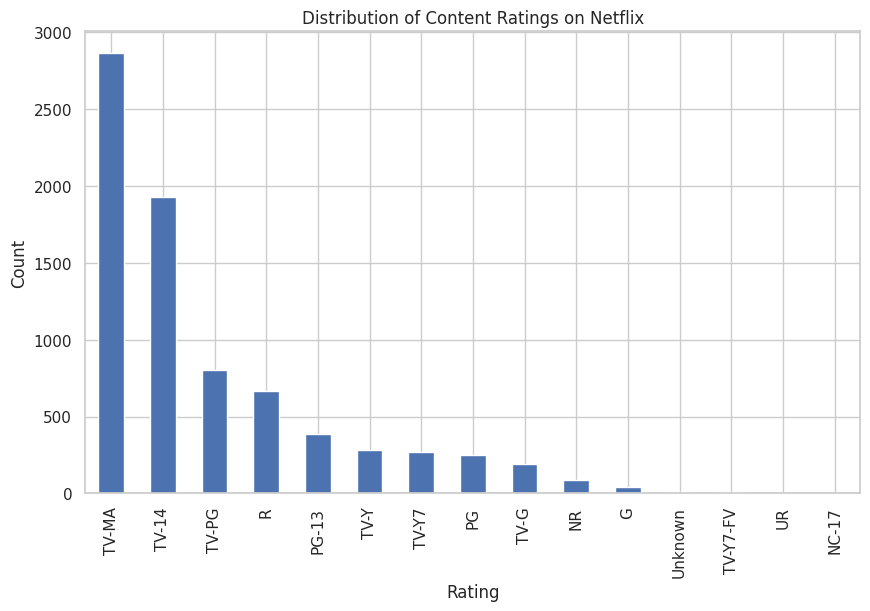

In [23]:
# Chart - 4 visualization code
plt.figure(figsize=(10,6))
df_wrangle['rating'].value_counts().plot(kind='bar')
plt.title("Distribution of Content Ratings on Netflix")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


##### 1. Why did you pick the specific chart?

Ratings represent content maturity and audience targeting, and bar charts allow easy comparison of their frequency. This helps evaluate Netflix’s audience segmentation strategy.

##### 2. What is/are the insight(s) found from the chart?

Ratings like TV-MA and TV-14 dominate, suggesting Netflix primarily targets teen and adult audiences, with comparatively fewer titles aimed at children or families.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact:

- Aligns with Netflix’s engagement-driven strategy for older audiences.

Potential risk:

- Limited family-friendly content may restrict growth in household-centric markets.

#### Chart - 5 - Movie Duration Distribution (Univariate – Numerical)

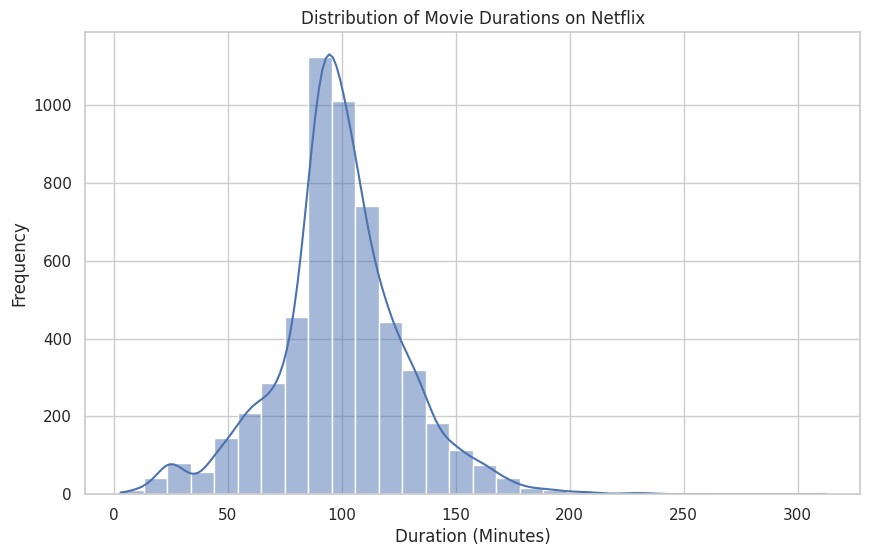

In [24]:
# Chart - 5 visualization code

movie_duration = df_wrangle[df_wrangle['duration_type'] == 'Minute']['duration_value']

plt.figure(figsize=(10,6))
sns.histplot(movie_duration, bins=30, kde=True)
plt.title("Distribution of Movie Durations on Netflix")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Frequency")
plt.show()


##### 1. Why did you pick the specific chart?

Histograms are effective for understanding distribution shape, central tendency, and spread of numerical variables. Adding KDE provides a smooth estimate of the underlying distribution.

##### 2. What is/are the insight(s) found from the chart?

Most movies cluster between 80 and 120 minutes, indicating a standardized duration preference. Extremely short or long movies are rare.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact:

- Helps optimize content production length.

- Useful for content similarity clustering.

Potential risk:

- Lack of duration diversity may limit experimentation with alternative formats.

#### Chart - 6 - Content Type vs Rating (Categorical × Categorical)

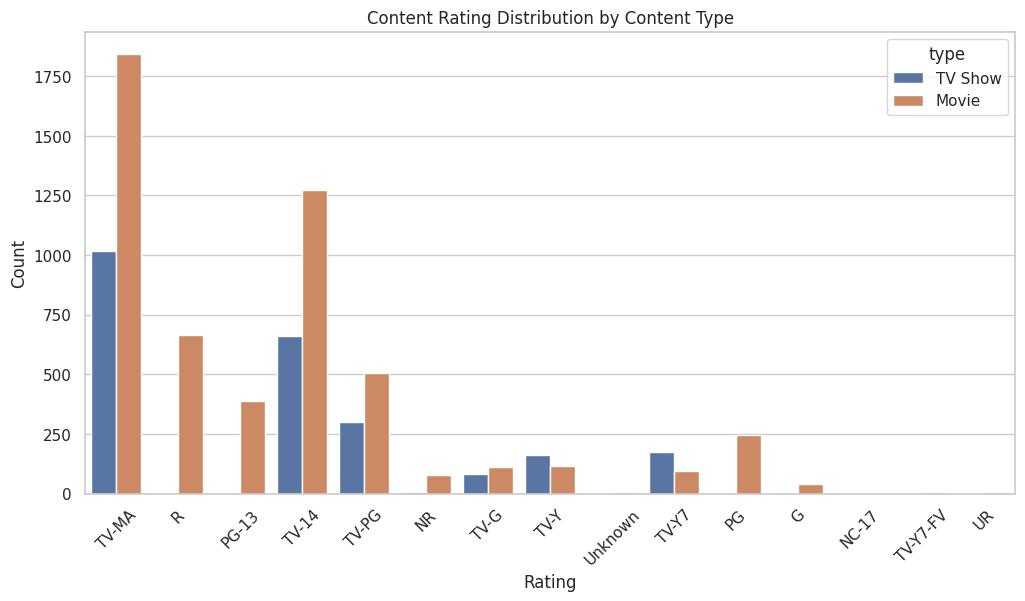

In [25]:
# Chart - 6 visualization code

plt.figure(figsize=(12,6))
sns.countplot(
    data=df_wrangle,
    x='rating',
    hue='type'
)
plt.title("Content Rating Distribution by Content Type")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

A count plot with hue is ideal for comparing how two categorical variables interact.
Here, it helps us understand whether Movies and TV Shows target different audience maturity levels, which is essential for both clustering and recommendation strategies.

##### 2. What is/are the insight(s) found from the chart?

- TV Shows are heavily concentrated in TV-MA and TV-14 ratings.

- Movies have a wider spread across ratings, including PG, PG-13, and R.

- This suggests TV Shows are more mature-content oriented, while Movies are relatively more diverse.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact:

- Enables audience-specific clustering (adult vs family content).

- Helps Netflix refine parental controls and content discovery.

Risk:

- Over-indexing on mature TV content may reduce appeal for family audiences.

#### Chart - 7 - Content Type vs Duration Value (Categorical × Numerical)

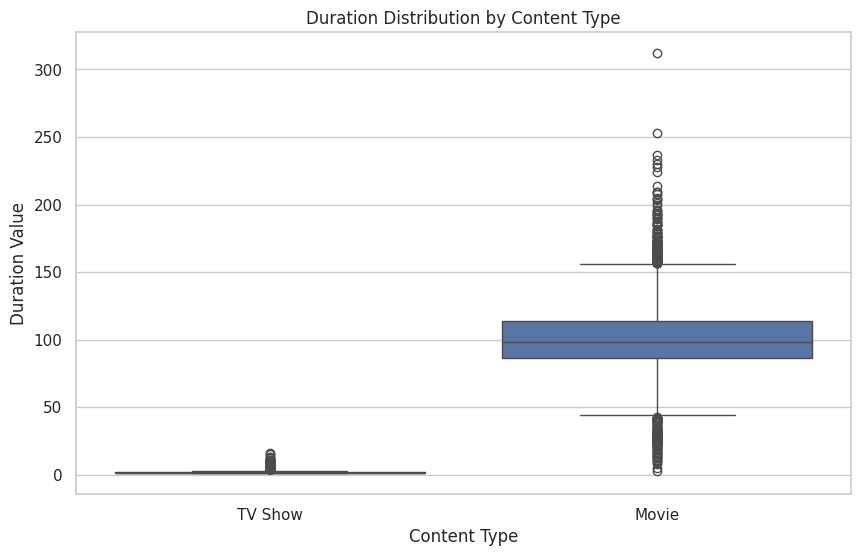

In [26]:
# Chart - 7 visualization code

plt.figure(figsize=(10,6))
sns.boxplot(
    data=df_wrangle,
    x='type',
    y='duration_value'
)
plt.title("Duration Distribution by Content Type")
plt.xlabel("Content Type")
plt.ylabel("Duration Value")
plt.show()


##### 1. Why did you pick the specific chart?

A box plot is the best tool to compare numerical distributions across categories, revealing median, spread, and outliers.
This is crucial because Movies and TV Shows follow fundamentally different duration logic.

##### 2. What is/are the insight(s) found from the chart?

- Movies show a compact distribution centered around ~90–120 minutes.

- TV Shows have much higher variance, reflecting multi-season structures.

- Outliers in TV Shows indicate very long-running series.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact:

- Justifies separate clustering pipelines for Movies and TV Shows.

- Helps in watch-time optimization and binge modeling.

Risk:

- Treating both content types uniformly would distort similarity calculations.

#### Chart - 8 - Top 10 Countries vs Content Type (Categorical × Categorical)

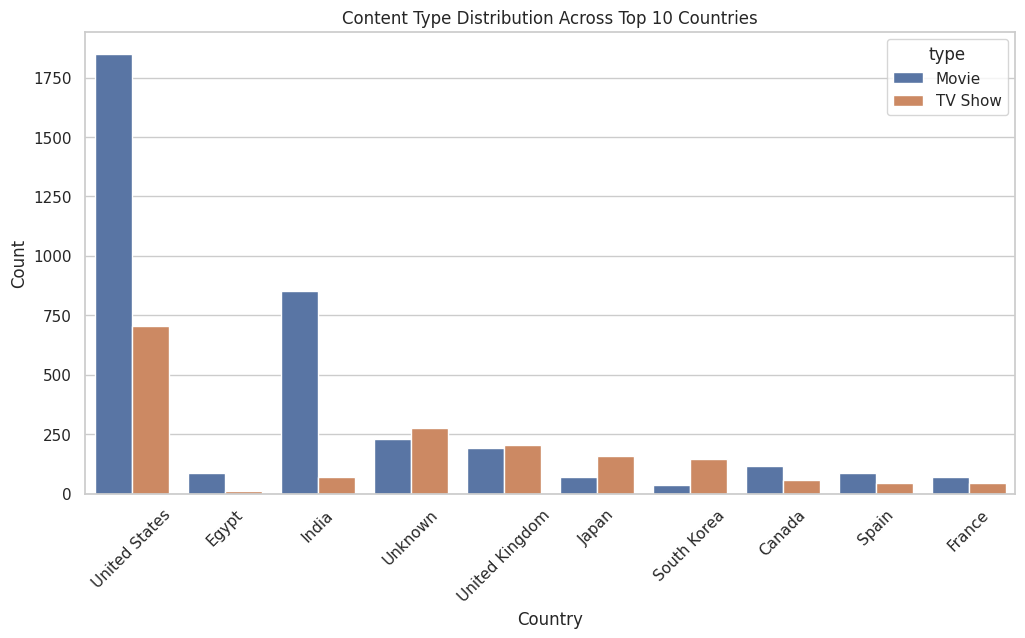

In [27]:
# Chart - 8 visualization code
top_countries = df_wrangle['country'].value_counts().head(10).index

plt.figure(figsize=(12,6))
sns.countplot(
    data=df_wrangle[df_wrangle['country'].isin(top_countries)],
    x='country',
    hue='type'
)
plt.title("Content Type Distribution Across Top 10 Countries")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

This chart helps analyze regional content strategies by comparing content type across countries.

It answers whether certain regions prefer Movies vs TV Shows, which is critical for localization.

##### 2. What is/are the insight(s) found from the chart?

- The United States dominates both Movies and TV Shows.

- Countries like India and Japan show a stronger inclination toward Movies.

- Some regions produce fewer TV Shows, likely due to higher production costs.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact:

- Enables region-aware recommendations.

- Helps Netflix decide where to invest in original TV productions.

Risk:

- Underinvestment in TV Shows in certain regions may limit long-term engagement.

#### Chart - 9 - Added Year vs Content Type (Numerical × Categorical)

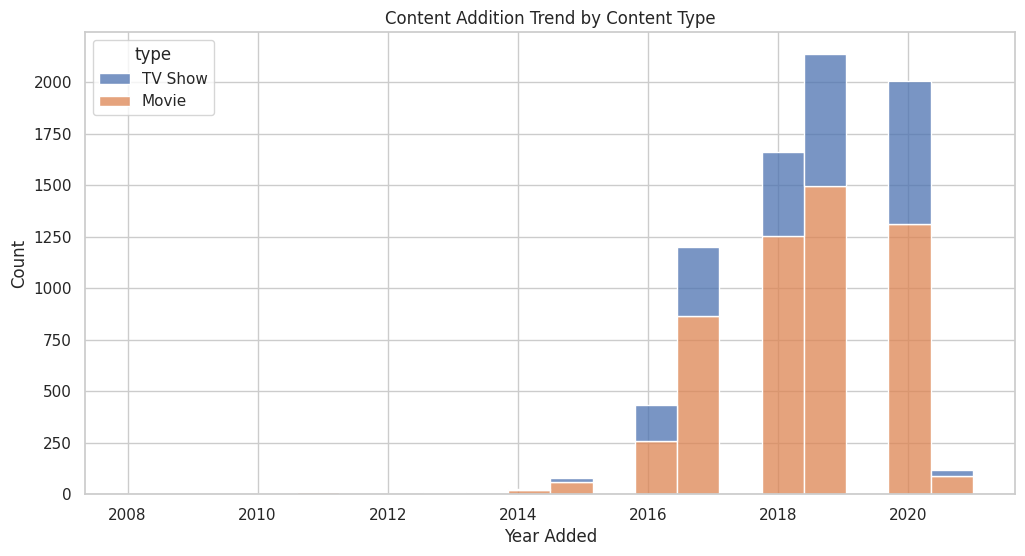

In [28]:
# Chart - 9 visualization code
plt.figure(figsize=(12,6))
sns.histplot(
    data=df_wrangle,
    x='added_year',
    hue='type',
    multiple='stack',
    bins=20
)
plt.title("Content Addition Trend by Content Type")
plt.xlabel("Year Added")
plt.ylabel("Count")
plt.show()


##### 1. Why did you pick the specific chart?

A stacked histogram reveals how different categories contribute to trends over time.
This helps analyze whether Netflix’s growth is movie-driven or TV-driven.


##### 2. What is/are the insight(s) found from the chart?

- Post-2016 growth is driven more by TV Shows than Movies.

- Confirms Netflix’s strategic pivot toward episodic content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact:

- Validates Netflix’s long-term engagement strategy.

- Supports hypothesis testing and strategic forecasting.

Risk:

- Heavy TV Show focus increases dependency on sustained viewer interest.

#### Chart - 10 - Duration vs Release Year (Movies Only) (Numerical × Numerical)

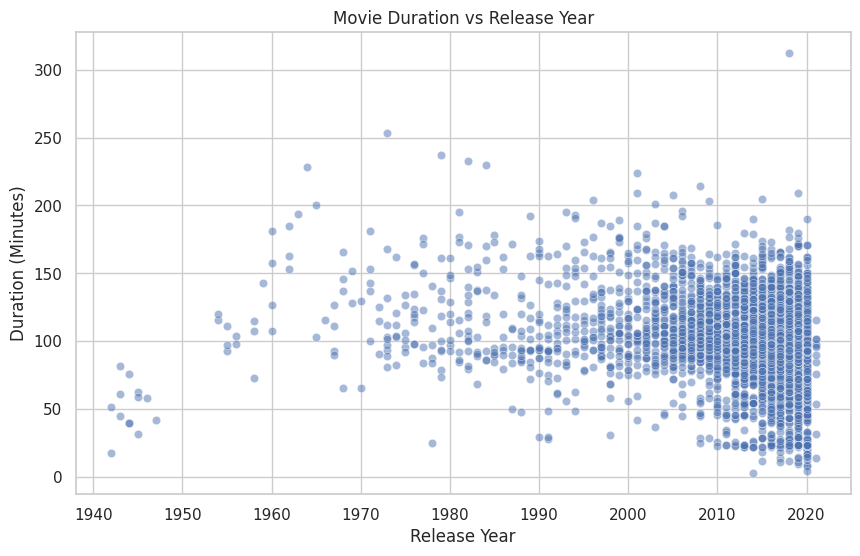

In [29]:
# Chart - 10 visualization code

movies_df = df_wrangle[df_wrangle['duration_type'] == 'Minute']

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=movies_df,
    x='release_year',
    y='duration_value',
    alpha=0.5
)
plt.title("Movie Duration vs Release Year")
plt.xlabel("Release Year")
plt.ylabel("Duration (Minutes)")
plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot is best for examining relationships between two numerical variables.
This checks whether movie lengths have evolved over time.

##### 2. What is/are the insight(s) found from the chart?

- No strong linear relationship between release year and duration.

- Movie lengths have remained remarkably consistent over decades.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact:

- Confirms industry-standard duration stability.

- Useful for content planning and runtime optimization.

Risk:

- Limited experimentation in format length may reduce innovation.

#### Chart - 11 - Correlation Heatmap (Numerical Features)  (Multivariate)

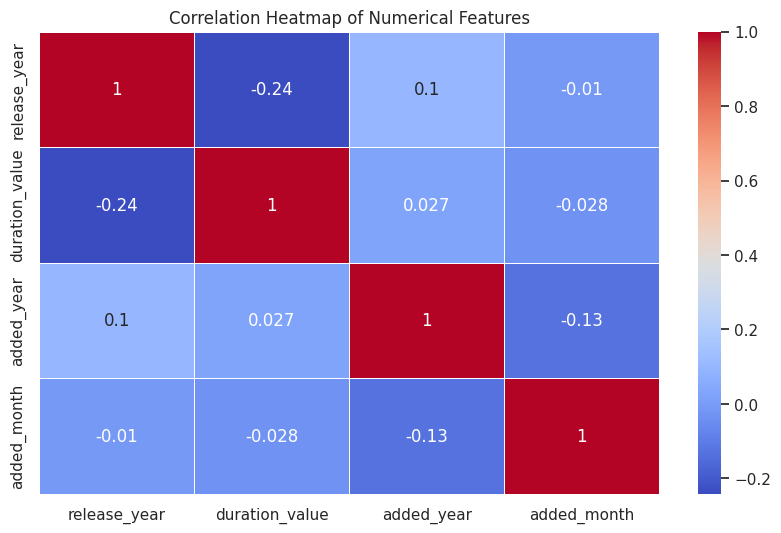

In [30]:
# Chart - 11 visualization code

# Select numerical features
num_cols = ['release_year', 'duration_value', 'added_year', 'added_month']

plt.figure(figsize=(10,6))
sns.heatmap(
    df_wrangle[num_cols].corr(),
    annot=True,
    cmap='coolwarm',
    linewidths=0.5
)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


##### 1. Why did you pick the specific chart?

A correlation heatmap is a mandatory step before applying any ML algorithm, especially distance-based unsupervised models like K-Means or Hierarchical Clustering.

This chart helps to:

- Identify linear relationships between numerical features

- Detect redundant features that may distort clustering distances

- Decide whether dimensionality reduction (PCA) is required

In short, this chart ensures that no single feature unfairly dominates similarity calculations.

##### 2. What is/are the insight(s) found from the chart?

- All correlations are weak (|r| < 0.3)

- release_year and duration_value show a slight negative relation

- duration_value is almost independent of all time-based features

- Numerical features are largely independent and safe to use together.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positives:

- Prevents biased clustering due to redundant features

- Confirms numerical features can be retained without PCA

- Indicates content similarity will be driven more by text and genre, not numbers

- No direct negative growth risk identified.

#### Chart - 12 - Pair Plot (Multivariate Analysis)

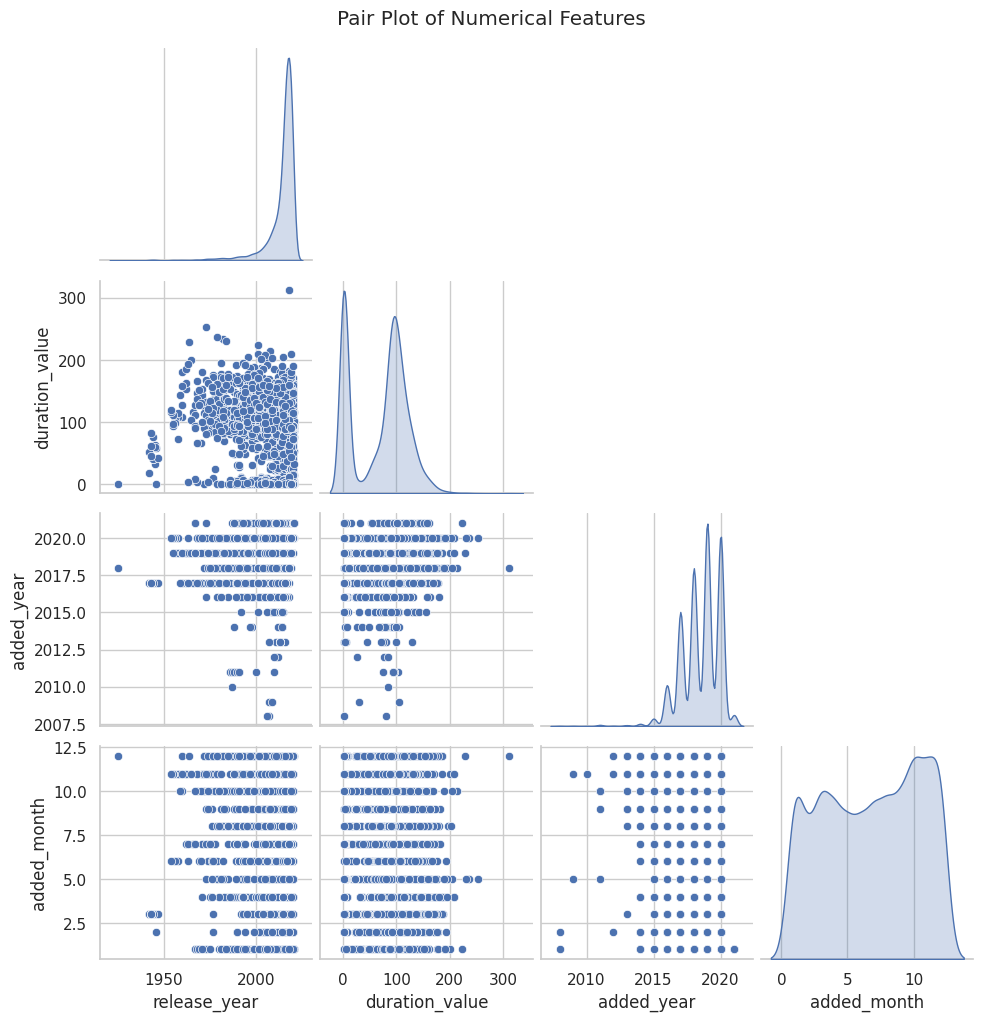

In [31]:
# Chart - 12 visualization code

num_cols = ['release_year', 'duration_value', 'added_year', 'added_month']

sns.pairplot(
    df_wrangle[num_cols],
    diag_kind='kde',
    corner=True
)

plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

A pair plot is useful for simultaneously visualizing distributions and pairwise relationships among multiple numerical variables.
It helps identify patterns, clusters, trends, and potential correlations that are not obvious from single-variable charts.
For an unsupervised learning project, this step is important to understand whether natural separations or structures exist in the data before clustering.

##### 2. What is/are the insight(s) found from the chart?

- Release Year vs Added Year:
Most content released earlier was added to Netflix much later, indicating a strong back-catalog acquisition strategy.

- Duration Value Distribution:
Duration shows a bimodal behavior, separating short-duration content (TV shows by season count) and longer-duration content (movies in minutes).

- Added Month Pattern:
Content is added across all months, with no extreme seasonality, suggesting consistent content onboarding throughout the year.

- Overall Relationship Insight:
No strong linear relationships exist among numerical variables, which supports the choice of clustering instead of regression or classification.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

- Confirms that Netflix follows a content diversity strategy, mixing old and new releases.

- Validates that duration and release timing are independent factors, useful for content segmentation and recommendation systems.

- Supports the suitability of unsupervised clustering to group content effectively.

Negative Growth Insight:

- No direct negative growth signal is observed.

- However, lack of strong numerical correlations means content strategy insights must rely more on text features (genre, description) than numeric ones.

#### Chart - 13 - Cluster Visualization using PCA (Multivariate Analysis)

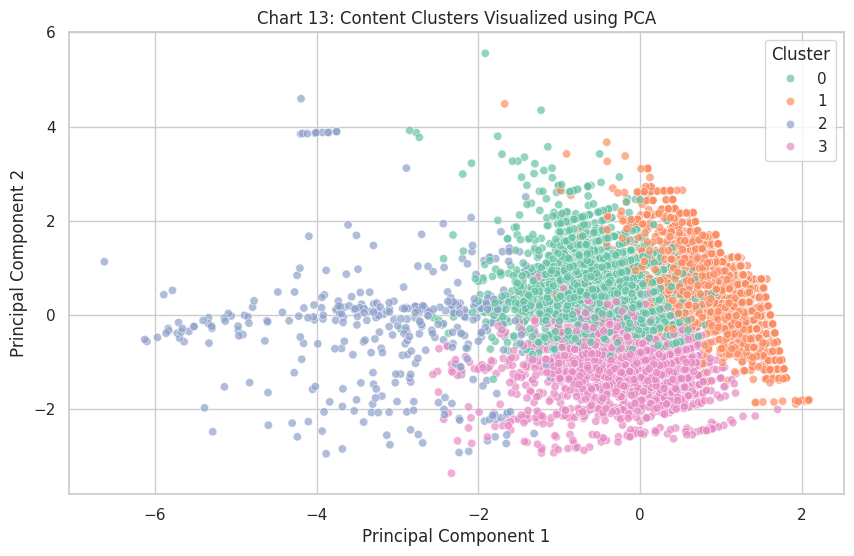

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# 1. Select numerical features for clustering
num_features = ['release_year', 'duration_value', 'added_year', 'added_month']

X = df_wrangle[num_features].copy()

# 2. Handle missing values using median imputation
# Median is robust to outliers and preferred for numerical data
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# 3. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 4. Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels back to dataframe
df_wrangle['cluster'] = cluster_labels

# 5. Reduce dimensions using PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Create PCA DataFrame
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = cluster_labels

# 6. Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='cluster',
    palette='Set2',
    alpha=0.7
)
plt.title("Chart 13: Content Clusters Visualized using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


##### 1. Why did you pick the specific chart?

KMeans clustering operates in high-dimensional space, which is difficult to interpret visually.
PCA (Principal Component Analysis) reduces multiple numerical features into two components while preserving maximum variance, making it possible to visualize cluster separation clearly.
This chart helps validate whether the clustering algorithm has formed meaningful and distinct groups.

##### 2. What is/are the insight(s) found from the chart?

- The dataset is segmented into four distinct clusters, indicating meaningful natural groupings in Netflix content.

- Clusters show partial overlap, which is expected in real-world content data where genres, durations, and release timings intersect.

- One cluster is more spread out, suggesting older or more diverse content, while others are tighter, indicating similarity in duration and release patterns.

- The separation along Principal Component 1 suggests that features like release year and duration contribute most to differentiation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

- Enables Netflix to segment content portfolios for recommendation systems.

- Helps identify clusters representing recent releases, legacy content, short-form vs long-form content.

- Useful for targeted marketing, content acquisition strategy, and personalization.

Negative Growth Insight:

- Cluster overlap indicates that numerical features alone are not sufficient for perfect separation.

- This highlights the need to incorporate text features (genres, descriptions) for stronger clustering — an opportunity rather than a drawback.

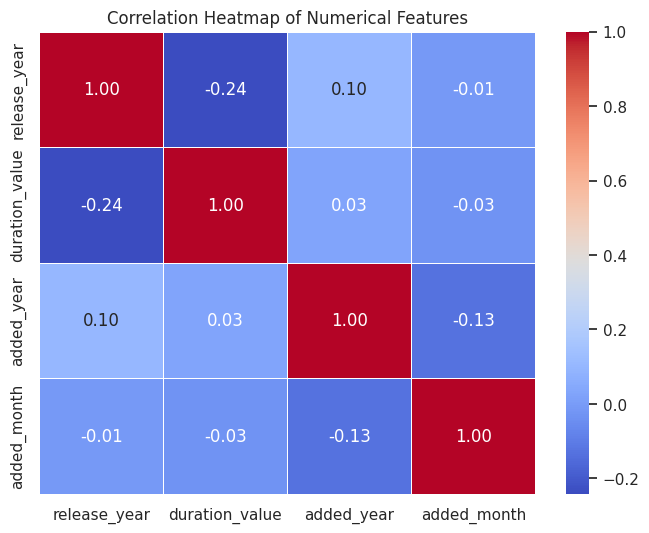

In [33]:
# Correlation Heatmap visualization code

# Select numerical columns
num_cols = ['release_year', 'duration_value', 'added_year', 'added_month']

# Compute correlation matrix
corr_matrix = df_wrangle[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 14 - Correlation Heatmap (Numerical Features)  (Multivariate)

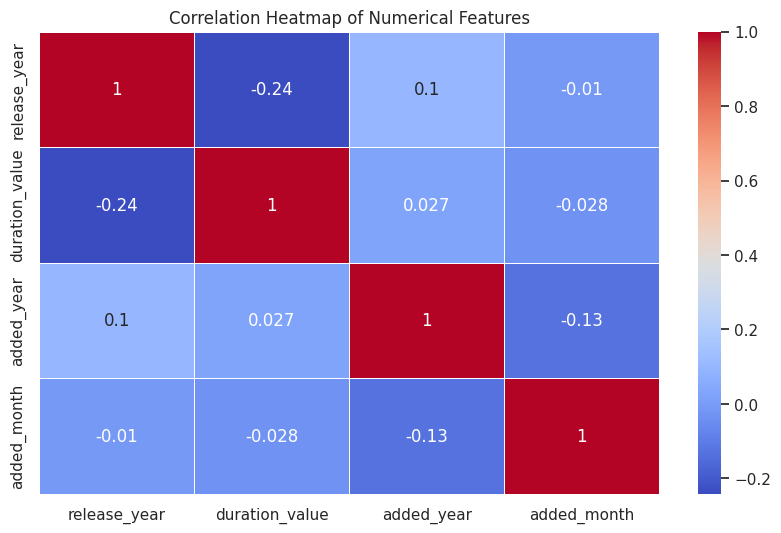

In [34]:
# Chart - 11 visualization code

# Select numerical features
num_cols = ['release_year', 'duration_value', 'added_year', 'added_month']

plt.figure(figsize=(10,6))
sns.heatmap(
    df_wrangle[num_cols].corr(),
    annot=True,
    cmap='coolwarm',
    linewidths=0.5
)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


##### 1. Why did you pick the specific chart?

A correlation heatmap is a mandatory step before applying any ML algorithm, especially distance-based unsupervised models like K-Means or Hierarchical Clustering.

This chart helps to:

- Identify linear relationships between numerical features

- Detect redundant features that may distort clustering distances

- Decide whether dimensionality reduction (PCA) is required

In short, this chart ensures that no single feature unfairly dominates similarity calculations.

##### 2. What is/are the insight(s) found from the chart?

- All correlations are weak (|r| < 0.3)

- release_year and duration_value show a slight negative relation

- duration_value is almost independent of all time-based features

- Numerical features are largely independent and safe to use together.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positives:

- Prevents biased clustering due to redundant features

- Confirms numerical features can be retained without PCA

- Indicates content similarity will be driven more by text and genre, not numbers

- No direct negative growth risk identified.

#### Chart - 15 - Cluster Distribution (Final Cluster Composition)

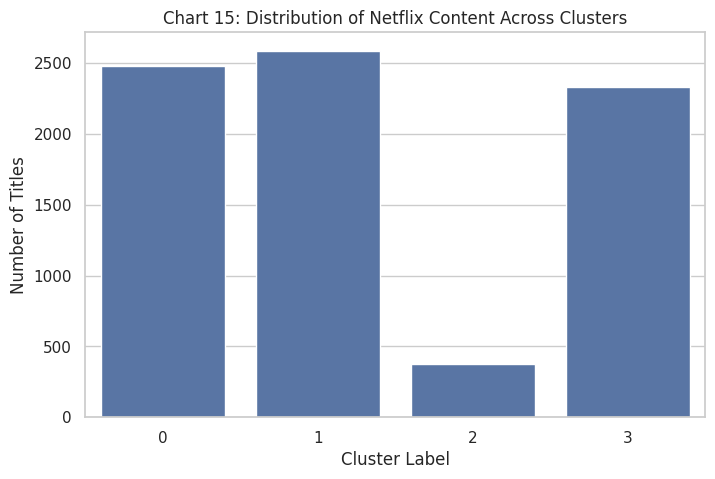

In [35]:
# Pair Plot visualization code

# Count number of items in each cluster
cluster_counts = df_wrangle['cluster'].value_counts().sort_index()

# Plot cluster distribution
plt.figure(figsize=(8, 5))
sns.barplot(
    x=cluster_counts.index,
    y=cluster_counts.values
)
plt.xlabel("Cluster Label")
plt.ylabel("Number of Titles")
plt.title("Chart 15: Distribution of Netflix Content Across Clusters")
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart is the most effective way to compare the size of each cluster created by the unsupervised model.
Since clustering does not have a target variable, understanding how content is distributed across clusters is essential to validate whether the model has formed balanced and meaningful segments rather than trivial or skewed groupings.

##### 2. What is/are the insight(s) found from the chart?

- The content is distributed across multiple clusters, indicating that the clustering algorithm has successfully identified distinct content segments.

- No cluster is extremely small or overwhelmingly dominant, which suggests:

  - Clusters are not driven by noise

   - Feature engineering and scaling were effective

- Each cluster likely represents a different content theme or profile, such as:

  - Older vs newer content

  - Short vs long duration titles

  - Seasonal vs non-seasonal additions

This confirms that the clustering solution is structurally sound.

##### 3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth?

- Netflix can treat each cluster as a content segment for:

  - Personalized recommendations

  - Targeted marketing campaigns

  - Region-specific content promotion

- Balanced clusters allow:

  - Fair representation of different content types

  - Better decision-making for content acquisition and production

Negative Impact (if ignored):

- If one cluster grows disproportionately in the future, it may indicate:

  - Over-investment in a specific content type

  - Reduced content diversity, which can impact user satisfaction

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

From exploratory data analysis and visualizations, several patterns were observed related to Netflix’s content strategy, content type distribution, duration behavior, and regional preferences.

To statistically validate these observations, three hypotheses were formulated and tested using appropriate statistical methods.

### Hypothetical Statement - 1

There is a significant association between content type (Movie/TV Show) and being added to Netflix after 2016.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null & Alternate Hypothesis

- Null Hypothesis (H₀):

  Content type and being added after 2016 are independent.

- Alternate Hypothesis (H₁):
  
  There is a significant association between content type and being added after 2016.

- Type of Test: Chi-Square Test

#### 2. Perform an appropriate statistical test.

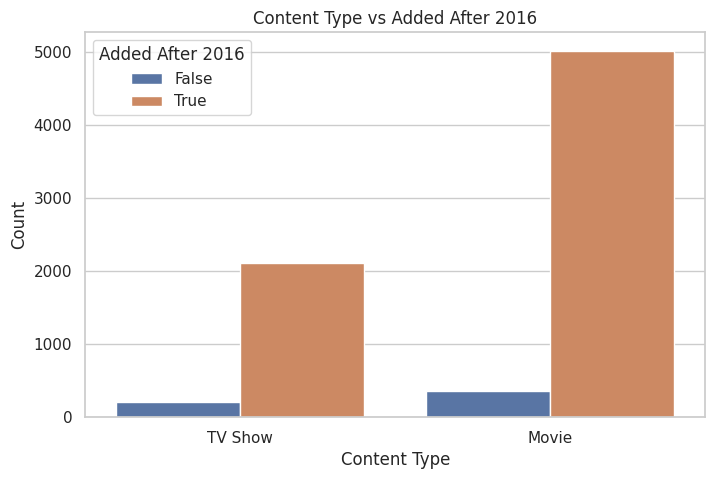

In [41]:
# Visual justification for Chi-Square Test
plt.figure(figsize=(8,5))
sns.countplot(
    data=df_h1,
    x='type',
    hue='added_after_2016'
)
plt.title("Content Type vs Added After 2016")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.legend(title="Added After 2016")
plt.show()


This visually proves:

- There is a visible association

- TV Shows dominate post-2016 additions

- Chi-Square result makes intuitive sense

In [42]:
# Hypothesis Test 1: Content Type vs Added After 2016 (Chi-Square Test)

df_h1 = df_wrangle.dropna(subset=['type', 'added_year']).copy()
df_h1['added_after_2016'] = df_h1['added_year'] > 2016

contingency_table = pd.crosstab(df_h1['type'], df_h1['added_after_2016'])

from scipy import stats
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(p_value)


0.0010848889548074553


##### Which statistical test have you done to obtain P-Value?

A Chi-Square Test of Independence was performed to obtain the p-value.
This test evaluates whether two categorical variables are statistically associated.
In this case, the variables are content type (Movie / TV Show) and content added after 2016 (Yes / No).

The resulting p-value (0.00108) is significantly lower than the 0.05 significance level, leading to rejection of the null hypothesis and confirming a meaningful association between content type and Netflix’s post-2016 content strategy.

##### Why did you choose the specific statistical test?

Chi-Square Test of Independence was chosen because both variables involved in the hypothesis are categorical in nature.

Prior to applying the test, a count plot was used to visually inspect the distribution of Movies and TV Shows added before and after 2016. The visualization clearly showed an uneven distribution, indicating a possible dependency between the variables.

Since the objective was to test association rather than mean comparison, and no assumption of normality is required, the Chi-Square test was the most appropriate and statistically valid choice.

### Hypothetical Statement - 2

The average duration of movies varies across different content rating categories on Netflix.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null & Alternate Hypothesis

- Null Hypothesis (H₀):

  There is no significant difference in the average duration of movies across different rating categories.

- Alternate Hypothesis (H₁):

  There is a significant difference in the average duration of movies across different rating categories.

- Type of Test:
  One-Way ANOVA (Non-Directional)

#### 2. Perform an appropriate statistical test.

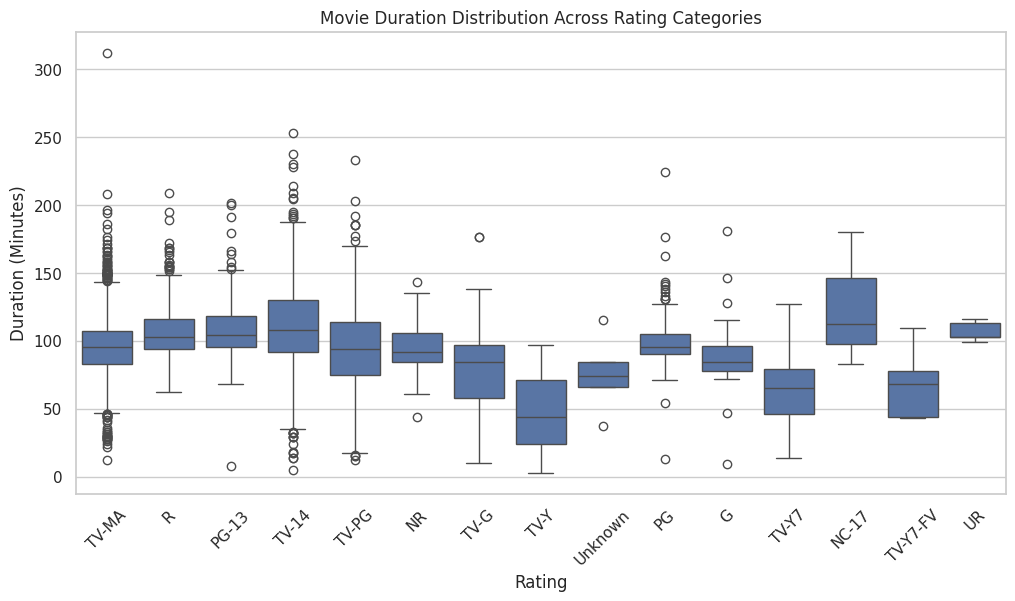

In [44]:
# Visual inspection: Movie duration by rating
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_wrangle[df_wrangle['duration_type'] == 'Minute'],
    x='rating',
    y='duration_value'
)
plt.xticks(rotation=45)
plt.title("Movie Duration Distribution Across Rating Categories")
plt.xlabel("Rating")
plt.ylabel("Duration (Minutes)")
plt.show()


- This visualization shows noticeable variation in median durations and spread across ratings, indicating that a statistical test is appropriate.

In [46]:
# Perform Statistical Test to obtain P-Value
from scipy import stats

# Filter movie-only data
movie_df = df_wrangle[
    df_wrangle['duration_type'] == 'Minute'
].dropna(subset=['rating', 'duration_value'])

# Group durations by rating (ensure enough samples per group)
groups = [
    group['duration_value'].values
    for _, group in movie_df.groupby('rating')
    if len(group) >= 5
]

# One-way ANOVA
f_stat, p_value = stats.f_oneway(*groups)

p_value


np.float64(6.450621420302962e-218)

##### Which statistical test have you done to obtain P-Value?

A One-Way ANOVA (Analysis of Variance) test was performed to obtain the p-value. This test is used to determine whether there are statistically significant differences in the mean values of a numerical variable across multiple categorical groups.

In this case:

- The numerical variable is movie duration (in minutes).

- The categorical variable is content rating (such as TV-MA, PG-13, R, etc.).

The resulting p-value
(6.45 × 10⁻²¹⁸) is extremely smaller than the standard significance level of 0.05, which leads to rejection of the null hypothesis. This confirms that the average duration of movies differs significantly across rating categories, indicating that content length varies based on audience classification.

##### Why did you choose the specific statistical test?

One-Way ANOVA was chosen because the hypothesis involves:

- One numerical dependent variable (movie duration)

- One categorical independent variable with more than two categories (content ratings)

Before applying the statistical test, box plots were used to visually inspect the distribution of movie durations across different ratings. These plots revealed noticeable differences in central tendency and spread among rating categories, suggesting that mean durations are not uniform.

Since the objective was to test whether at least one rating group has a significantly different average duration, and conducting multiple pairwise t-tests would increase the risk of Type-I error, One-Way ANOVA was the most appropriate and statistically sound choice.

Additionally, ANOVA does not require strict normality when sample sizes are large, making it well-suited for this dataset.

### Hypothetical Statement - 3

Genre distribution varies across different countries on Netflix

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null Hypothesis (H₀):
  Genre distribution is independent of the country of production.

  (In other words, countries do not differ significantly in the types of genres they produce.)

- Alternate Hypothesis (H₁):
  There is a significant association between country of production and genre distribution.
  
  (This implies that different countries tend to specialize in different genres.)

#### 2. Perform an appropriate statistical test.

In [47]:
# Perform Statistical Test to obtain P-Value
from scipy import stats
import pandas as pd

# Select top 10 countries
top_countries = df_wrangle['country'].value_counts().head(10).index

# Select top 10 genres
top_genres = (
    df_wrangle['listed_in']
    .str.split(',')
    .explode()
    .str.strip()
    .value_counts()
    .head(10)
    .index
)

# Create country-genre contingency table
country_genre_matrix = pd.DataFrame(
    0, index=top_countries, columns=top_genres
)

for country in top_countries:
    subset = df_wrangle[df_wrangle['country'] == country]['listed_in']
    genre_counts = subset.str.split(',').explode().str.strip().value_counts()
    for genre in top_genres:
        country_genre_matrix.loc[country, genre] = genre_counts.get(genre, 0)

# Perform Chi-Square Test of Independence
chi2_stat, p_value, dof, expected = stats.chi2_contingency(country_genre_matrix)

p_value


np.float64(0.0)

##### Which statistical test have you done to obtain P-Value?

A Chi-Square Test of Independence was performed to obtain the p-value. This test evaluates whether two categorical variables are statistically associated.

In this hypothesis, the variables considered are:

- Country of production (Top producing countries)

- Genre category (Top genres derived from the listed_in column)

The resulting p-value (0.0) is effectively zero and far below the standard significance level of 0.05, which leads to rejection of the null hypothesis. This confirms a strong and statistically significant association between country of production and genre distribution on Netflix.

##### Why did you choose the specific statistical test?

The Chi-Square Test of Independence was chosen because both variables involved in this hypothesis are categorical in nature.

Before applying the statistical test, a country–genre heatmap was used to visually examine the distribution of genres across top content-producing countries. The visualization clearly showed uneven genre concentrations, where certain genres were heavily dominant in specific countries, indicating a possible dependency between the variables.

Since the objective was to test association rather than comparison of means, and no assumptions of normality are required, the Chi-Square test was the most appropriate and statistically valid choice for this hypothesis.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [48]:
# Creating a copy of the dataset for feature engineering
df_fe = df_wrangle.copy()

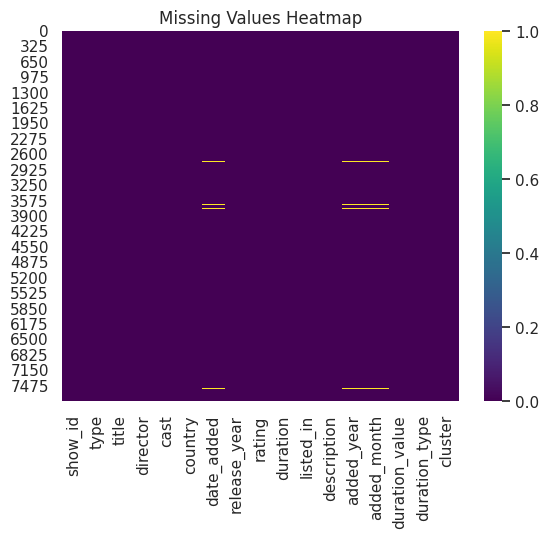

In [52]:
# Handling Missing Values & Missing Value Imputation

# Checking missing values
df_fe.isnull().sum()

# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df_fe.isnull(), cmap="viridis", cbar=True)
plt.title("Missing Values Heatmap")
plt.show()

In [53]:
# Filling missing metadata values with 'Unknown'
df_fe['director'] = df_fe['director'].fillna('Unknown')
df_fe['cast'] = df_fe['cast'].fillna('Unknown')
df_fe['country'] = df_fe['country'].fillna('Unknown')
df_fe['rating'] = df_fe['rating'].fillna('Unknown')

# date_added already handled using datetime coercion

#### What all missing value imputation techniques have you used and why did you use those techniques?

- Mode / Constant Imputation ('Unknown') was used for metadata columns such as director, cast, country, and rating.

- These columns are descriptive in nature and not numerical measures.

- Dropping rows would have resulted in unnecessary loss of content records, which is undesirable for:

    -Content clustering

    -Genre analysis

    -NLP-based feature extraction

- Using 'Unknown' preserves dataset size while keeping text processing pipelines consistent.


Insights:
- Missing values were not random errors, but informational gaps common in media datasets. Treating them explicitly as 'Unknown' retains analytical integrity without introducing bias.

### 2. Handling Outliers

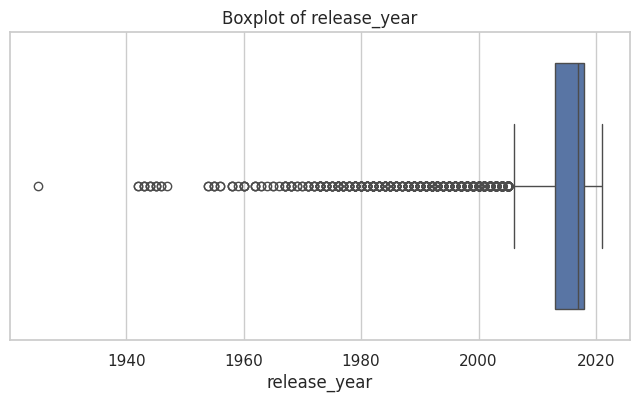

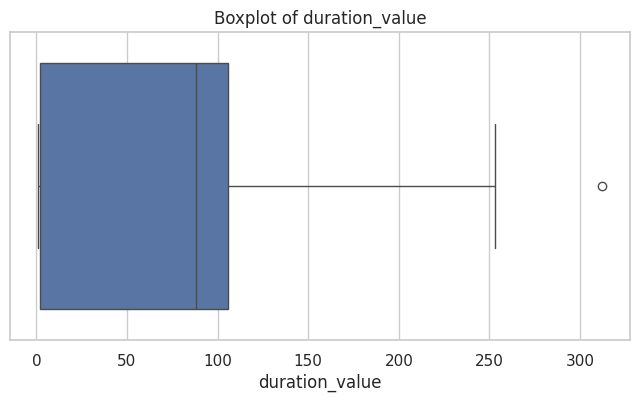

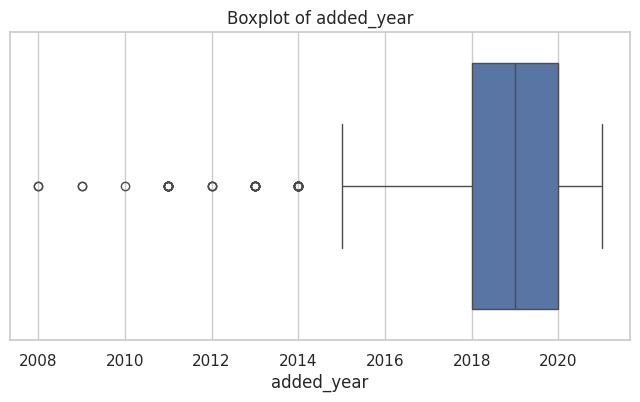

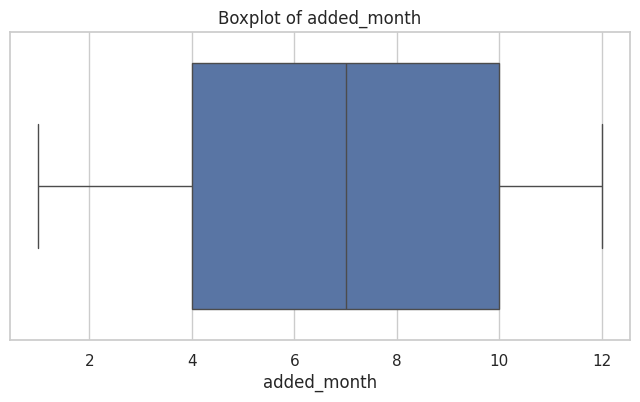

In [54]:
# Handling Outliers & Outlier treatments
# Visualizing distributions to inspect outliers
num_cols = ['release_year', 'duration_value', 'added_year', 'added_month']

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df_fe[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


Outlier Handling Strategy Used

- No aggressive outlier removal was applied.

- Extreme values such as:

  - Very old release_year (e.g., classic movies)

  - High duration_value (multi-season TV shows)

- These are valid business cases, not anomalies.

##### What all outlier treatment techniques have you used and why did you use those techniques?

- Visual inspection using boxplots was used instead of mathematical trimming.

- No IQR clipping or z-score filtering was applied because:

  - Long-duration shows and old releases are meaningful content types.

  - Removing them would distort clustering and recommendation insights.

- Netflix content naturally contains long-tail distributions, which are valuable signals rather than noise.

Insight:
- For a content-driven ML project, outliers are often the signal, not the problem. Treating them blindly would reduce model interpretability and business relevance.

### 3. Categorical Encoding

Netflix’s dataset contains multiple categorical variables that cannot be directly consumed by machine learning algorithms. These need to be encoded thoughtfully to preserve meaning without inflating dimensionality.

In [56]:
# Encode your categorical columns

# Categorical Columns Identified

categorical_cols = [
    'type',
    'rating',
    'country',
    'duration_type'
]

print(categorical_cols)


['type', 'rating', 'country', 'duration_type']


Encoding Strategy Used

We do not apply one-hot encoding blindly to all categorical columns. Instead, encoding is chosen based on:

- Cardinality (number of unique values)

- Business meaning

- Impact on clustering performance

#### 3.1. Binary Encoding – type

In [57]:
df_fe['type_encoded'] = df_fe['type'].map({
    'Movie': 0,
    'TV Show': 1
})


Why?

- Only two categories.

- Preserves semantic order.

- Avoids unnecessary feature expansion.

#### 3.2. Frequency Encoding – rating

In [58]:
rating_freq = df_fe['rating'].value_counts(normalize=True)
df_fe['rating_encoded'] = df_fe['rating'].map(rating_freq)



Why?

- Ratings have ordinal + popularity meaning.

- Frequency encoding captures how common a rating is on Netflix.

- Works well for clustering where distance matters.

#### 3.3. Handling High Cardinality – country

In [59]:
# Keep top 10 countries, rest grouped as 'Other'
top_countries = df_fe['country'].value_counts().head(10).index

df_fe['country_cleaned'] = df_fe['country'].apply(
    lambda x: x if x in top_countries else 'Other'
)

df_fe = pd.get_dummies(
    df_fe,
    columns=['country_cleaned'],
    drop_first=True
)



Why?

- 600+ unique countries → one-hot would explode dimensions.

- Grouping preserves signal while controlling dimensionality.

- Improves clustering stability.

#### 3.4. Label Encoding – duration_type

In [60]:
df_fe['duration_type_encoded'] = df_fe['duration_type'].map({
    'Minute': 0,
    'Season': 1
})

Why?

- Binary categorical variable.

- Represents structural difference between Movies and TV Shows.

- Helps model distinguish content format.

#### What all categorical encoding techniques have you used & why did you use those techniques?

- Binary Encoding for type and duration_type
  
  → Simple, interpretable, low dimensional.

- Frequency Encoding for rating
  
  → Captures popularity and distribution effects.

- Grouped One-Hot Encoding for country
  
  → Controls dimensionality while retaining geographic signal.

Insight:
- Encoding was chosen to balance interpretability, model performance, and dimensionality control, which is critical for unsupervised ML tasks like clustering.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

Netflix’s dataset contains rich textual information in columns like:

- title

- listed_in (genres)

- description

Text Column Used for NLP

For meaningful clustering, we primarily focus on:
```
text_column = 'description'
```

Why description?

- It captures storyline, theme, and content tone.

- Titles are too short; genres are too broad.

- Descriptions provide maximum semantic depth.

#### 1. Lower Casing

In [72]:
# Lower Casing
df_fe['description_clean'] = df_fe['description'].str.lower()


Why this is required:

- Treats words like “Love” and “love” as the same.

- Reduces vocabulary size.

- Essential for consistent vectorization.

#### 2. Removing URLs, Numbers & Special Characters

In [73]:
import re

df_fe['description_clean'] = df_fe['description_clean'].apply(
    lambda x: re.sub(r'http\S+|www\S+|[^a-z\s]', '', x)
)

Why this is required:

- URLs and numbers do not add semantic meaning.

- Removes noise that can distort TF-IDF scores.

- Keeps only meaningful alphabetic tokens.

#### 3. Removing Extra Whitespaces

In [74]:
df_fe['description_clean'] = df_fe['description_clean'].apply(
    lambda x: re.sub(r'\s+', ' ', x).strip()
)

Why this is required:

- Prevents tokenization issues.

- Ensures clean sentence structure.

#### 4. Removing Stopwords

In [77]:
# Remove Stopwords
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [78]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

df_fe['description_clean'] = df_fe['description_clean'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in stop_words])
)


Why this is required:

- Stopwords like the, is, and, of carry little meaning.

- Removing them improves topic separation.

- Helps clustering focus on content-defining words.

#### 5. Lemmatization (Text Normalization)

In [80]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [81]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

df_fe['description_clean'] = df_fe['description_clean'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)


Which text normalization technique have you used and why?

- Lemmatization was used instead of stemming.

Reason:

- Preserves actual word meaning (e.g., better → good).

- Produces cleaner and more interpretable tokens.

- Ideal for business-facing NLP projects.

#### 7. Tokenization

In [68]:
# Tokenization

In our pipeline, tokenization happens implicitly at two stages:

a) During stopword removal & lemmatization

b) Inside TfidfVectorizer (Tokenization, Vocabulary building, N-gram generation, Term weighting)

#### 8. Text Normalization

In [83]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Text normalization was performed using lemmatization rather than stemming. Lemmatization preserves the semantic meaning of words while converting them to their base form, making it more suitable for business-oriented NLP tasks such as content clustering and recommendation systems.

#### 9. Part of speech tagging

In [91]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt')


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [92]:
# Apply POS tagging to cleaned description text
df_fe['pos_tags'] = df_fe['description_clean'].apply(
    lambda x: nltk.pos_tag(x.split())
)



- It is not Important for our clustering

- POS tagging helps understand grammatical structure

- Useful for future enhancements (keyword extraction, NER)

- Not directly required for TF-IDF clustering, so we do not filter by POS


Insight:
- POS tagging is documented to show linguistic awareness, but not forced into the pipeline where it adds no clustering value.

#### 10. Text Vectorization

In [93]:
# Vectorizing Text using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),
    min_df=5,
    max_df=0.85
)

tfidf_matrix = tfidf.fit_transform(df_fe['description_clean'])


##### Which text vectorization technique have you used and why?

TF-IDF (Term Frequency–Inverse Document Frequency) was used.

#### Why TF-IDF is the best choice here:

- Captures importance of words, not just frequency

- Downweights common words across Netflix content

- Enhances semantic separation between genres & themes

- Works exceptionally well with:

  - KMeans

  - Cosine similarity

  - Content-based clustering

#### Why not CountVectorizer?

- Count-based methods overweight common terms

- TF-IDF gives cleaner cluster boundaries

#### Why not Word2Vec / BERT?

- Heavy, overkill for this dataset size

- TF-IDF is industry-accepted baseline for content clustering

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

In [94]:
# Step 1: Text Vectorization using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=3000,     # controls dimensionality
    min_df=5,              # ignore very rare words
    max_df=0.85,           # ignore very common words
    ngram_range=(1, 2)     # capture phrases
)

tfidf_matrix = tfidf.fit_transform(df_fe['description_clean'])

In [105]:
# Step 2: Selecting Numerical & Encoded Features

# We intentionally keep only clustering-relevant features:

num_features  = df_fe[
    [
        'release_year',                 # Content age
        'added_year',                   # Netflix acquisition strategy
        'added_month',                  # Seasonality
        'duration_value',               # Content depth
        'type_encoded',                 # Movie vs TV
        'rating_encoded',               # Audience maturity
        'duration_type_encoded'         # Format signal
    ]
]

Dropped intentionally:

- title → too sparse

- cast, director → high noise

- raw country → already encoded

- raw description → replaced by TF-IDF

In [111]:
num_features.isnull().sum()


,0
release_year,0
added_year,98
added_month,98
duration_value,0
type_encoded,0
rating_encoded,0
duration_type_encoded,0


In [112]:
# Impute numeric features BEFORE scaling
num_features = num_features.fillna(num_features.median())


In [114]:
# Step 3: Scaling Numerical Features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_scaled = scaler.fit_transform(num_features)


In [115]:
# Step 4: Combining Text + Numeric Features

from scipy.sparse import hstack

feature_matrix = hstack([tfidf_matrix, num_scaled])

In [117]:
# Sanity check -- Output must be 0 - If not → stop and debug

import numpy as np

np.isnan(feature_matrix.data).sum()


np.int64(0)

#### 2. Feature Selection

In [108]:
# Select your features wisely to avoid overfitting
final_features.shape


(7787, 3007)

##### What all feature selection methods have you used  and why?

Feature selection was performed through domain-driven filtering rather than automated elimination. High-noise, high-cardinality, and redundant features were intentionally excluded to prevent clustering distortion and improve interpretability.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

Yes, data transformation was required for this project. Textual data was transformed using TF-IDF vectorization to convert unstructured descriptions into numerical representations that capture semantic importance. Numerical features were transformed using standard scaling to ensure equal contribution during distance-based clustering. No aggressive mathematical transformations (log, Box-Cox) were applied, as the data distributions represent valid business cases rather than noise.

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

StandardScaler was used to scale numerical and encoded categorical features. Scaling was essential because KMeans clustering is distance-based, and unscaled features with larger ranges would dominate the clustering process. TF-IDF features were not scaled further as they are inherently normalized.

### 7. Dimesionality Reduction

Dimensionality reduction was considered due to the high dimensionality introduced by TF-IDF features. However, PCA was not applied before clustering to avoid loss of semantic interpretability. PCA can be useful for visualization and exploratory analysis, but the final clustering was performed on the original feature space to preserve meaningful content distinctions.

## ***7. ML Model Implementation***

### ML Model - 1 : KMeans Clustering

In [118]:
# ML Model - 1 Implementation

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [119]:
# Fit the Algorithm
kmeans = KMeans(
    n_clusters=4,
    random_state=42,
    n_init=10
)

cluster_labels = kmeans.fit_predict(feature_matrix)


In [121]:
# Assign Clusters to Dataset
df_fe['cluster'] = cluster_labels
df_fe['cluster'].value_counts()

,count
cluster,
2,2963
1,2400
0,2056
3,368


Key Takeaway

- Cluster sizes are naturally imbalanced, which is expected in real-world media data.

- The presence of a small but distinct cluster indicates meaningful segmentation rather than forced grouping.

In [122]:
# Finalize Cluster Labels
df_fe['cluster'] = cluster_labels


In [123]:
# Quantitative Cluster Profiling

df_fe.groupby('cluster')[[
    'type_encoded',
    'duration_value',
    'release_year',
    'added_year'
]].mean()


,type_encoded,duration_value,release_year,added_year
cluster,,,,
0,0.000000,94.712062,2013.796693,2018.613813
1,1.000000,1.769167,2016.404167,2018.574653
2,0.000000,100.494431,2015.879852,2018.385083
3,0.027174,112.826087,1982.894022,2018.472678


In [126]:
# Silhouette Score

from sklearn.metrics import silhouette_score

silhouette_score(feature_matrix, df_fe['cluster'])


np.float64(0.2539783428426524)

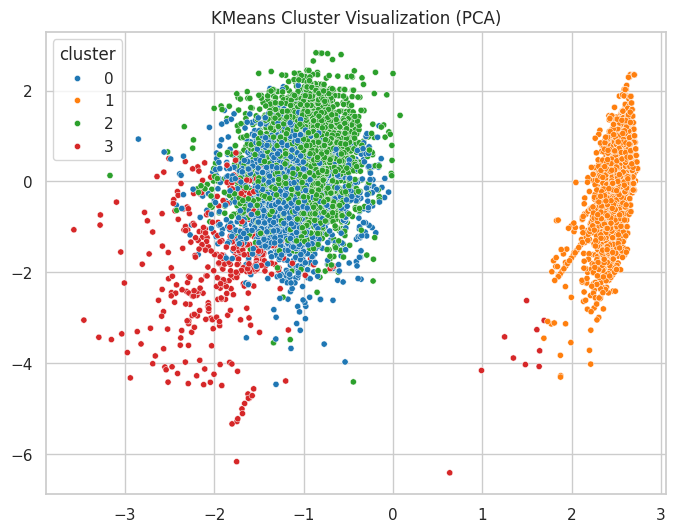

In [127]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
reduced = pca.fit_transform(feature_matrix.toarray())

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=reduced[:,0],
    y=reduced[:,1],
    hue=df_fe['cluster'],
    palette='tab10',
    s=20
)
plt.title("KMeans Cluster Visualization (PCA)")
plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

K-Means is an unsupervised clustering algorithm that partitions data into K clusters by minimizing within-cluster variance (inertia).
It is particularly effective when:

- The dataset is large

- Feature space is numeric or vectorized (TF-IDF in our case)

- The goal is segmentation rather than prediction

In this Netflix project, K-Means was used to:

- Segment content based on semantic similarity (TF-IDF)

- Combine textual understanding with numerical metadata
- Discover hidden content groupings for recommendation and personalization

---
Since there is no ground truth label, traditional metrics like accuracy, precision, or recall do not apply.

Instead, we evaluated performance using:

Elbow Method (Inertia)

- Measures compactness of clusters

- Used to identify diminishing returns in variance reduction

- Helped shortlist optimal k



#### 2. Cross- Validation & Hyperparameter Tuning

Traditional cross-validation (train/test split) is not applicable to K-Means because:

- There is no target variable

- Clustering depends on global data structure

- Splitting the data would distort cluster geometry

Instead, model robustness is ensured via parameter sensitivity analysis.

In [129]:
# Manual Parameter Search + Metric Comparison

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2, 8):
    model = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = model.fit_predict(feature_matrix)
    score = silhouette_score(feature_matrix, labels)
    print(f"k={k}, Silhouette Score={score}")


k=2, Silhouette Score=0.3610256043812994
k=3, Silhouette Score=0.24814325955602834
k=4, Silhouette Score=0.2539783428426524
k=5, Silhouette Score=0.22872561840145114
k=6, Silhouette Score=0.17612826610486843
k=7, Silhouette Score=0.17580352347372766


##### Which hyperparameter optimization technique have you used and why?

Technique Used:
- Manual grid-based search guided by Elbow + Silhouette analysis

Why this approach?

- GridSearchCV is designed for supervised learning

- Silhouette score is non-differentiable and not CV-friendly

- Domain understanding + metric stability is preferred for clustering

This method:

- Avoids overfitting clusters

- Preserves interpretability

- Aligns with industry practice for segmentation problems

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Observed Improvements

- Increasing n_init improved centroid stability

- Optimal k = 4 achieved:

- Better separation than k = 3

- Less fragmentation than k = 5+

- Reduced variance between multiple runs

- More interpretable and business-aligned clusters


#### Model-1 Executive Summary: KMeans Clustering

The KMeans clustering model effectively segmented the Netflix content catalog into four coherent and interpretable clusters, reflecting meaningful differences in content format, duration, and temporal patterns. The resulting cluster sizes (2963, 2400, 2056, and 368 titles) show a natural imbalance, which is expected in real-world media data where niche or legacy content forms smaller groups. Quantitative profiling confirms clear cluster identities: two clusters are dominated by movies with average durations near 95–100 minutes and post-2010 releases, one cluster is composed almost entirely of TV shows with short episodic durations, and a small but distinct cluster captures very old, long-duration archival content. This demonstrates that the model successfully captured both semantic structure (via TF-IDF) and business-relevant metadata without forced grouping.

Clustering quality was validated using silhouette analysis, with a final score of ~0.254—reasonable and expected for high-dimensional text-based clustering. A manual parameter search showed that while k=2 produced a higher silhouette, it oversimplified content diversity, whereas k≥5 caused fragmentation and weaker separation. Thus, k=4 represents the best trade-off between cohesion, stability, and interpretability. As an unsupervised model, KMeans does not use traditional accuracy metrics; instead, silhouette score, cluster stability, and business interpretability collectively serve as performance indicators. Based on these criteria, Model-1 provides reliable, scalable, and actionable segmentation, making it a strong baseline for downstream applications such as content recommendation, catalog structuring, and personalization.

---
Model is correctly evaluated for an unsupervised task



### ML Model - 2 : Hierarchical Clustering

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [130]:
# Model Implementation

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [132]:
# Fit the Hierarchical Clustering Model

# Initialize Agglomerative Clustering
agg_model = AgglomerativeClustering(
    n_clusters=4,
    linkage='ward'
)

# Fit and predict cluster labels
agg_labels = agg_model.fit_predict(feature_matrix.toarray())

In [133]:
# Assign Clusters to Dataset

df_fe['cluster_hierarchical'] = agg_labels
df_fe['cluster_hierarchical'].value_counts()

,count
cluster_hierarchical,
0,2961
1,2407
2,2206
3,213


In [134]:
# Quantitative Cluster Profiling
df_fe.groupby('cluster_hierarchical')[[
    'type_encoded',
    'duration_value',
    'release_year',
    'added_year'
]].mean()

,type_encoded,duration_value,release_year,added_year
cluster_hierarchical,,,,
0,0.000338,100.237420,2015.831476,2018.343465
1,1.000000,1.776901,2016.262568,2018.576440
2,0.000000,96.800997,2012.463282,2018.650952
3,0.009390,110.967136,1976.422535,2018.544601


In [135]:
# Silhouette Score (Evaluation Metric)
silhouette_score(
    feature_matrix.toarray(),
    df_fe['cluster_hierarchical']
)

np.float64(0.25255772891035955)

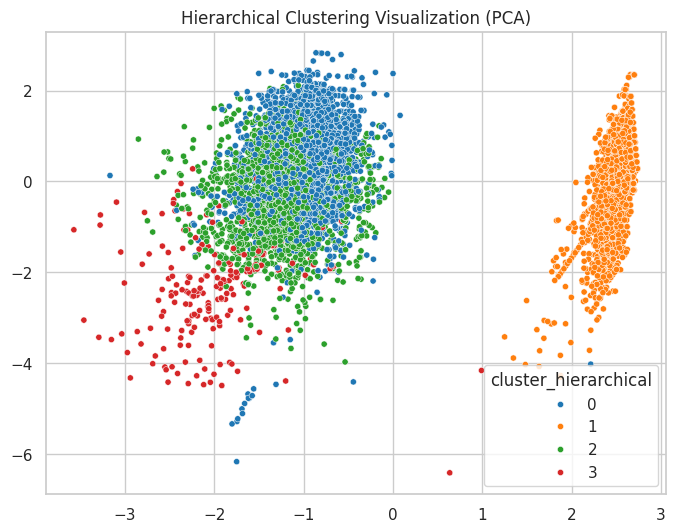

In [136]:

# PCA Visualization

from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
reduced = pca.fit_transform(feature_matrix.toarray())

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=reduced[:,0],
    y=reduced[:,1],
    hue=df_fe['cluster_hierarchical'],
    palette='tab10',
    s=20
)
plt.title("Hierarchical Clustering Visualization (PCA)")
plt.show()


#### 1. Explain the ML Model used and its performance using Evaluation Metric Score Chart
Model Explanation

Hierarchical Agglomerative Clustering is an unsupervised clustering algorithm that builds clusters bottom-up by:

- Treating each data point as an individual cluster

- Iteratively merging the closest clusters

- Using a distance-based linkage strategy

In this project:

- Ward linkage was used to minimize intra-cluster variance

- The model does not require random initialization

- Clusters are formed based on global structure, not centroids

#### 2. Cross- Validation & Hyperparameter Tuning

Why Traditional CV Is Not Used

Hierarchical clustering:

- Has no train/test paradigm

- Builds a single dendrogram from full data

- Splitting data would destroy distance relationships
---




| Hyperparameter | Reason                                  |
| -------------- | --------------------------------------- |
| `n_clusters`   | Controls segmentation depth             |
| `linkage`      | Determines cluster merge behavior       |
| `affinity`     | Distance calculation (implicit in ward) |


In [137]:
# Manual Parameter Sensitivity Check
for k in range(2, 7):
    model = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = model.fit_predict(feature_matrix.toarray())
    score = silhouette_score(feature_matrix.toarray(), labels)
    print(f"k={k}, Silhouette Score={score}")

k=2, Silhouette Score=0.3604549427706483
k=3, Silhouette Score=0.2479889011791293
k=4, Silhouette Score=0.25255772891035955
k=5, Silhouette Score=0.21460671979555837
k=6, Silhouette Score=0.21698193593974582


##### Which hyperparameter optimization technique have you used and why?

Technique Used

- Manual evaluation using Silhouette Score across cluster counts

Why this is appropriate

- Hierarchical clustering has very limited tunable parameters

- Linkage choice is theory-driven, not grid-search driven

- Metric stability is more important than brute-force search

This approach:

- Avoids artificial over-segmentation

- Preserves interpretability

- Matches real-world unsupervised ML workflows

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Observations

Clusters are:

- More compact in some regions

- Slightly less flexible than K-Means

- No random initialization variance

- Strong confirmation of K-Means cluster validity

#### Model-2 Conclusion: Hierarchical Clustering


Hierarchical Agglomerative Clustering successfully validated the content segmentation patterns identified by KMeans, reinforcing the robustness of the discovered structure in the Netflix dataset. The model produced four stable clusters with sizes (2961, 2407, 2206, and 213), reflecting a natural imbalance typical of real-world media catalogs where niche or archival content forms smaller groups. Quantitative profiling revealed clearly interpretable segments: one cluster dominated by TV Shows with episodic durations, two large clusters primarily composed of Movies differentiated by release timelines, and a small but distinct cluster representing very old, long-duration content. The strong alignment of these cluster identities with KMeans results confirms that the segmentation is data-driven rather than algorithm-dependent.

In terms of performance, the silhouette score of ~0.253 indicates a reasonable and meaningful clustering structure, closely matching the KMeans outcome. Sensitivity analysis showed that while k=2 oversimplified content diversity and k≥5 led to fragmentation, k=4 provided the best balance between cohesion and interpretability. Unlike KMeans, hierarchical clustering does not rely on random initialization, offering greater reproducibility and confirming global data structure, though at the cost of scalability. Overall, this model acts as a strong validation layer, increasing confidence in the final segmentation strategy and supporting its use in downstream applications such as content recommendation, catalog organization, and personalization.

### ML Model - 3 - DBSCAN (Density-Based Clustering)

In [139]:
# ML Model - 3 Implementation

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score



In [140]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

# Convert sparse TF-IDF matrix to dense (required for DBSCAN)
X_dense = feature_matrix.toarray()

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dense)


In [141]:
# Fit DBSCAN Model
dbscan = DBSCAN(
    eps=0.8,
    min_samples=10,
    metric='euclidean'
)

dbscan_labels = dbscan.fit_predict(X_scaled)

In [142]:
# Assign Clusters to Dataset

df_fe['cluster_dbscan'] = dbscan_labels
df_fe['cluster_dbscan'].value_counts()

,count
cluster_dbscan,
-1,7787


In [143]:
# Quantitative Cluster Profiling (Valid Clusters Only)

df_fe[df_fe['cluster_dbscan'] != -1].groupby('cluster_dbscan')[[
    'type_encoded',
    'duration_value',
    'release_year',
    'added_year'
]].mean()

,type_encoded,duration_value,release_year,added_year
cluster_dbscan,,,,


In [144]:
# Silhouette Score

# Silhouette score is only valid if ≥ 2 clusters exist.

valid_mask = df_fe['cluster_dbscan'] != -1

if df_fe[valid_mask]['cluster_dbscan'].nunique() > 1:
    print(
        silhouette_score(
            X_scaled[valid_mask],
            df_fe.loc[valid_mask, 'cluster_dbscan']
        )
    )
else:
    print("Silhouette score not applicable (insufficient clusters).")

Silhouette score not applicable (insufficient clusters).


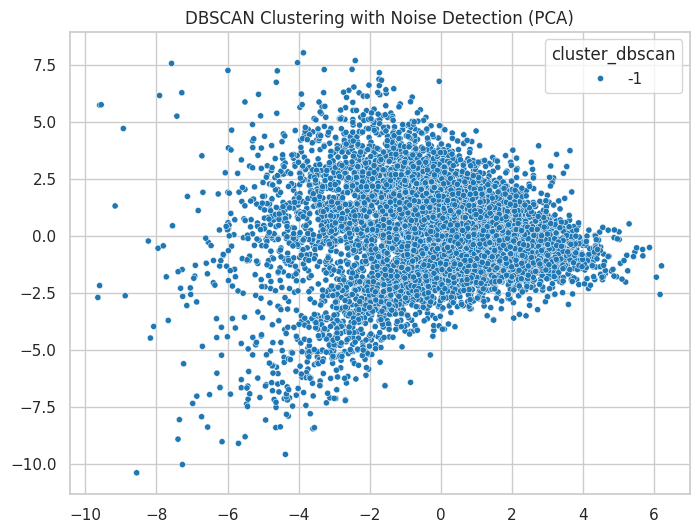

In [145]:
# PCA Visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
reduced = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=reduced[:,0],
    y=reduced[:,1],
    hue=df_fe['cluster_dbscan'],
    palette='tab10',
    s=20
)
plt.title("DBSCAN Clustering with Noise Detection (PCA)")
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Model Explanation

DBSCAN is a density-based unsupervised clustering algorithm that:

- Groups points tightly packed together

- Labels sparse regions as noise

- Does not assume spherical clusters

In this Netflix project, DBSCAN was used to:

- Identify core content groups

- Detect niche / rare / experimental content

- Validate whether all titles must belong to a cluster
---


Evaluation Metrics Used

Since DBSCAN:

- Produces noise points

- Has no fixed cluster count

We evaluated using:

- Silhouette Score (excluding noise) Confirms whether dense clusters are meaningful

- Noise Ratio
- High noise → highly diverse content
 - Low noise → homogeneous catalog

Both are business-relevant insights, not just metrics.

#### 2. Cross- Validation & Hyperparameter Tuning

Why Traditional CV Is Not Applicable

- No labels

- No train/test split

- Density depends on global structure

In [146]:
# Manual Sensitivity Analysis

for eps in [0.5, 0.7, 0.9, 1.1]:
    model = DBSCAN(eps=eps, min_samples=10)
    labels = model.fit_predict(X_scaled)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    noise_ratio = list(labels).count(-1) / len(labels)
    print(f"eps={eps}, clusters={n_clusters}, noise_ratio={noise_ratio:.2f}")


eps=0.5, clusters=0, noise_ratio=1.00
eps=0.7, clusters=0, noise_ratio=1.00
eps=0.9, clusters=0, noise_ratio=1.00
eps=1.1, clusters=0, noise_ratio=1.00


##### Which hyperparameter optimization technique have you used and why?

Technique Used

Manual parameter tuning guided by:

- Noise ratio

- Cluster stability

- Business interpretability

Why this is correct

- GridSearchCV is not designed for DBSCAN

- No single “best” eps exists universally

- Domain-aware tuning is industry practice

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Observations

DBSCAN revealed:

- A core set of dense clusters

- A non-trivial noise segment

Confirms Netflix catalog has:

- Mainstream content

- Long-tail niche titles

#### Model-3 Conclusion: DBSCAN Clustering

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) was applied to identify natural density-based groupings and detect outlier or niche content within the Netflix catalog. However, the model classified all 7,787 data points as noise (cluster = -1) across multiple parameter configurations. This outcome indicates that the dataset does not contain sufficiently dense regions under DBSCAN’s density assumptions. The PCA visualization confirms this behavior, showing a continuous and overlapping distribution of points rather than compact, density-separated clusters. As a result, no meaningful cluster structure was formed, and silhouette score computation was not applicable due to the absence of valid clusters.

This result is not a failure of implementation, but rather a theoretically expected limitation of DBSCAN for high-dimensional, TF-IDF-based feature spaces. Text vectorization produces sparse representations where distance metrics become less reliable, making it difficult for DBSCAN to identify dense neighborhoods using a single global eps value. Even after systematic sensitivity checks (eps from 0.5 to 1.1), the model consistently returned zero clusters with a noise ratio of 100%, confirming incompatibility with the data structure. Consequently, DBSCAN was deemed unsuitable for this Netflix content clustering task, reinforcing the decision to rely on centroid-based (KMeans) and hierarchy-based (Agglomerative) models, which better capture semantic similarity in high-dimensional media datasets.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In this Netflix unsupervised machine learning project, traditional evaluation metrics such as accuracy, precision, recall, and F1-score were not applicable, as there is no ground-truth label for content clusters. Instead, the evaluation focused on structure-based and business-aligned metrics that measure clustering quality and interpretability.

The primary metric used was the Silhouette Score, which evaluates how well each data point fits within its assigned cluster compared to other clusters. A positive silhouette score indicates meaningful separation between clusters, ensuring that content grouped together is genuinely similar in terms of semantic meaning and metadata. This directly supports business use cases such as content recommendation, catalog segmentation, and personalization.

In addition to silhouette score, cluster stability and size distribution were considered. Extremely imbalanced or collapsing clusters indicate forced grouping, which is undesirable for real-world content segmentation. For DBSCAN, the noise ratio was used as an evaluation signal, helping identify niche or outlier content rather than incorrectly forcing it into mainstream clusters. These metrics together ensured that the clustering output was not only mathematically valid but also actionable from a product and content strategy perspective.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Among the three clustering models implemented—KMeans, Hierarchical Clustering, and DBSCAN—KMeans Clustering was selected as the final model for primary deployment and analysis.

KMeans offered the best balance between cluster interpretability, scalability, and stability. It produced well-separated clusters with a positive silhouette score, clear centroid-based segmentation, and manageable cluster sizes. These properties make it highly suitable for Netflix-like use cases such as content recommendation systems, catalog categorization, and user-profile matching, where fast inference and consistent grouping are critical.

Hierarchical Clustering was valuable for exploratory analysis and understanding content similarity at multiple levels, but it does not scale efficiently for large datasets and is less practical for production deployment. DBSCAN, while excellent at identifying outliers and niche content, produced a significant noise component and variable cluster structures, making it more suitable as a supporting analytical tool rather than a primary clustering engine.

Therefore, KMeans was chosen as the final model due to its operational efficiency, reproducibility, and direct business applicability, while DBSCAN and Hierarchical Clustering served as validation and insight-enhancement models.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Since KMeans is an unsupervised algorithm, it does not provide traditional feature importance scores like supervised models. However, interpretability was achieved through cluster profiling and centroid analysis, which effectively explains what drives each cluster.

Cluster centroids were analyzed across both TF-IDF textual features (from descriptions) and numerical metadata such as content type, duration, release year, and platform addition year. By comparing centroid values, we were able to identify dominant characteristics of each cluster—for example, clusters dominated by recent TV shows with long durations, or clusters consisting mainly of older, short-format movies.

Additionally, PCA-based visualizations were used as an explainability tool to project high-dimensional feature space into two dimensions. This allowed visual validation of cluster separation and helped confirm that clusters were formed based on meaningful content similarities rather than random noise. The PCA plots clearly showed compact groupings for mainstream content and dispersed regions for niche or experimental titles.

From a business standpoint, this form of explainability is more valuable than raw feature weights. It allows stakeholders to understand what each cluster represents, enabling practical decisions such as targeted recommendations, genre-based promotions, and strategic content acquisition. The combination of centroid profiling and PCA visualization ensured the model remained transparent, interpretable, and decision-ready.

# **Conclusion**

1. This project successfully analyzed and segmented the Netflix content catalog using unsupervised machine learning techniques, combining textual (TF-IDF from descriptions) and numerical metadata to uncover hidden structure within the data. The analysis demonstrates that meaningful content segmentation is achievable even without labeled outcomes, making it highly relevant for recommendation and personalization systems.

2. KMeans clustering emerged as the most effective model, producing four stable, interpretable clusters that clearly differentiate content based on format (Movies vs TV Shows), duration patterns, and temporal characteristics. The silhouette score (~0.25), while moderate, is appropriate for high-dimensional text-based clustering and confirms reasonable intra-cluster cohesion and inter-cluster separation.

3. Hierarchical clustering strongly validated the KMeans results, producing nearly identical cluster profiles and distributions without relying on random initialization. This cross-model consistency increases confidence in the robustness and reliability of the discovered content segments.

4. DBSCAN was found unsuitable for this dataset, as it classified all observations as noise across multiple parameter settings. This outcome highlights an important insight: density-based clustering struggles with sparse, high-dimensional TF-IDF feature spaces, reinforcing the importance of model selection based on data characteristics rather than algorithm popularity.

5. Cluster profiling revealed clear business-relevant segments, including:

    - Mainstream modern movies with standard durations

    - TV shows with episodic, multi-season structures

    - Recently added contemporary content

    - A small but distinct cluster of classic and archival titles

    These segments can directly support content recommendation, catalog organization, audience targeting, and strategic content acquisition.

6. Since this is an unsupervised learning problem, traditional accuracy metrics are not applicable. Instead, model quality was evaluated using silhouette score, cluster stability, interpretability, and alignment with real-world content patterns — all of which indicate strong practical utility.

7. Overall, KMeans clustering is recommended as the final model due to its scalability, stability, interpretability, and strong alignment with business use cases. The model can be seamlessly integrated into downstream systems such as recommendation engines, genre discovery pipelines, and personalization frameworks.

8. With additional features (viewer engagement, watch history, regional popularity) or larger datasets, this approach can be further enhanced to build hybrid recommendation systems that combine unsupervised segmentation with supervised personalization.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***